In [27]:
import cv2 as cv
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt
import math
import imutils

dddd
686,71,591,591


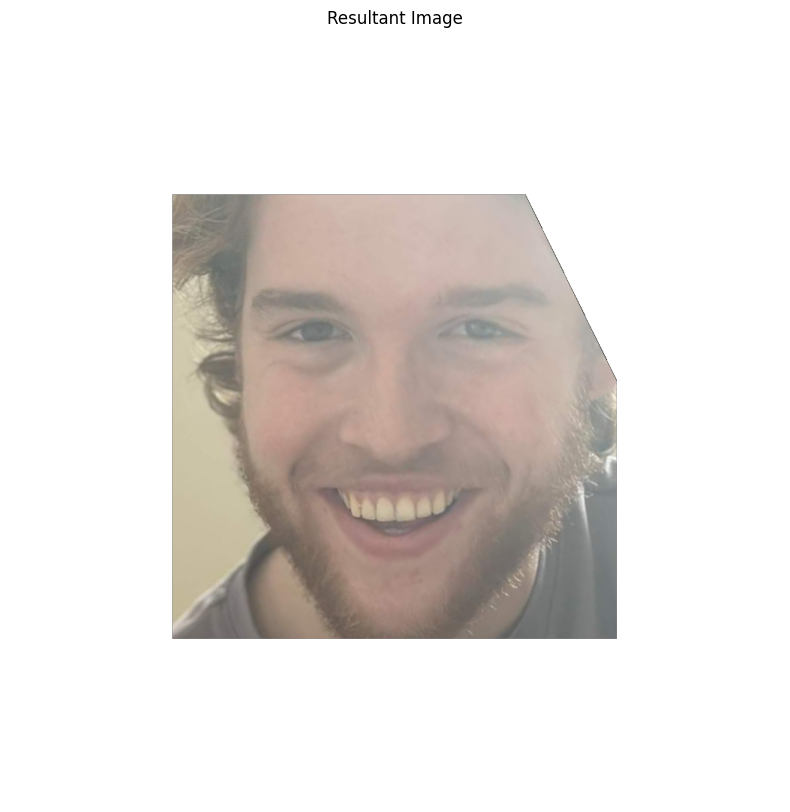

In [84]:
def execute():
  def rotateImage(face):
      face_data = face.location_data
      rx = face_data.relative_keypoints[0].x
      ry = face_data.relative_keypoints[0].y
      lx = face_data.relative_keypoints[1].x
      ly = face_data.relative_keypoints[1].y
      deltaY = abs(ly - ry)
      deltaX = abs(lx - rx)
      rotationAngle = np.rad2deg(math.tan(deltaY/deltaX))
      rotatedImage = imutils.rotate(sample_img[:,:,::-1].copy(), rotationAngle)
      return rotatedImage


  mp_face_detection = mp.solutions.face_detection
  face_detection = mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5)
  mp_drawing = mp.solutions.drawing_utils
  sample_img = cv.imread('sample.jpeg')

  plt.figure(figsize = [10, 10])


  face_detection_results = face_detection.process(sample_img[:,:,::-1])
  if not(hasattr(face_detection_results, 'detections') and len(face_detection_results.detections) > 0):
    return
  
  rotatedImage = rotateImage(face_detection_results.detections[0])

  rotated_face_detection_results = face_detection.process(rotatedImage[:,:,::-1])

  print('dddd')
  boundingBox = rotated_face_detection_results.detections[0].location_data.relative_bounding_box
  xmin = int(boundingBox.xmin * sample_img.shape[1])
  ymin = int(boundingBox.ymin * sample_img.shape[0])
  width = int(boundingBox.width * sample_img.shape[1])
  height = int(boundingBox.height * sample_img.shape[0])

  rotatedImage = rotatedImage[ymin:ymin+height, xmin:xmin+height]
  print(f'{xmin},{ymin},{width},{height}')

  background = np.zeros((1024,1024,4), np.uint8)

  x_offset= (background.shape[0] - rotatedImage.shape[0]) //2
  y_offset= (background.shape[1] - rotatedImage.shape[1]) //2



  alpha = np.sum(rotatedImage, axis=-1) > 0
  alpha = np.uint8(alpha * 255)
  rotatedRGBAImage = np.dstack((rotatedImage, alpha))

  background[y_offset:y_offset+rotatedRGBAImage.shape[0], x_offset:x_offset+rotatedRGBAImage.shape[1]] = rotatedRGBAImage
  
  plt.title("Resultant Image");plt.axis('off');plt.imshow(background);plt.show()
  cv.imwrite('image.png', cv.cvtColor(background, cv.COLOR_RGBA2BGRA))

execute()